# Laboratorio 3 – Deep Learning
### Universidad del Valle de Guatemala
Este notebook cubre los ejercicios 1 al 4 del laboratorio, utilizando el dataset PolyMNIST (modalidades m0 a m4).

---

## Introducción
El objetivo de este laboratorio es desarrollar modelos de deep learning capaces de reconocer caracteres manuscritos utilizando el dataset **PolyMNIST**, el cual cuenta con 5 modalidades distintas (`m0` a `m4`). Cada modalidad presenta imágenes con diferentes fondos, pero los mismos dígitos.

En este notebook se abordarán los siguientes puntos:
1. Mostrar ejemplos de cada modalidad.
2. Análisis exploratorio del dataset.
3. Implementación de dos modelos CNN.
4. Implementación de una red neuronal simple sin convoluciones.

## Ejercicio 1 – Ejemplos de cada modalidad

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
!unzip "/content/drive/MyDrive/data/PolyMNIST.zip" -d "/content/"


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/PolyMNIST/MMNIST/train/m4/1873.9.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._1873.9.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/3346.9.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._3346.9.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/4656.9.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._4656.9.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/1030.9.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._1030.9.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/2310.3.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._2310.3.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/1962.4.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._1962.4.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/3257.4.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._3257.4.png  
  inflat

Muestra de imagenes por cada modalidad
- en este aparado visualizamos algunas de las imágenes que tiene cada modalidad. Se mostrarán las primeras 5 imágenes por cada modalidad con el fin de observa de mejor manera como se encutrar y asi poder determinar que cambiamos podremos hacer.

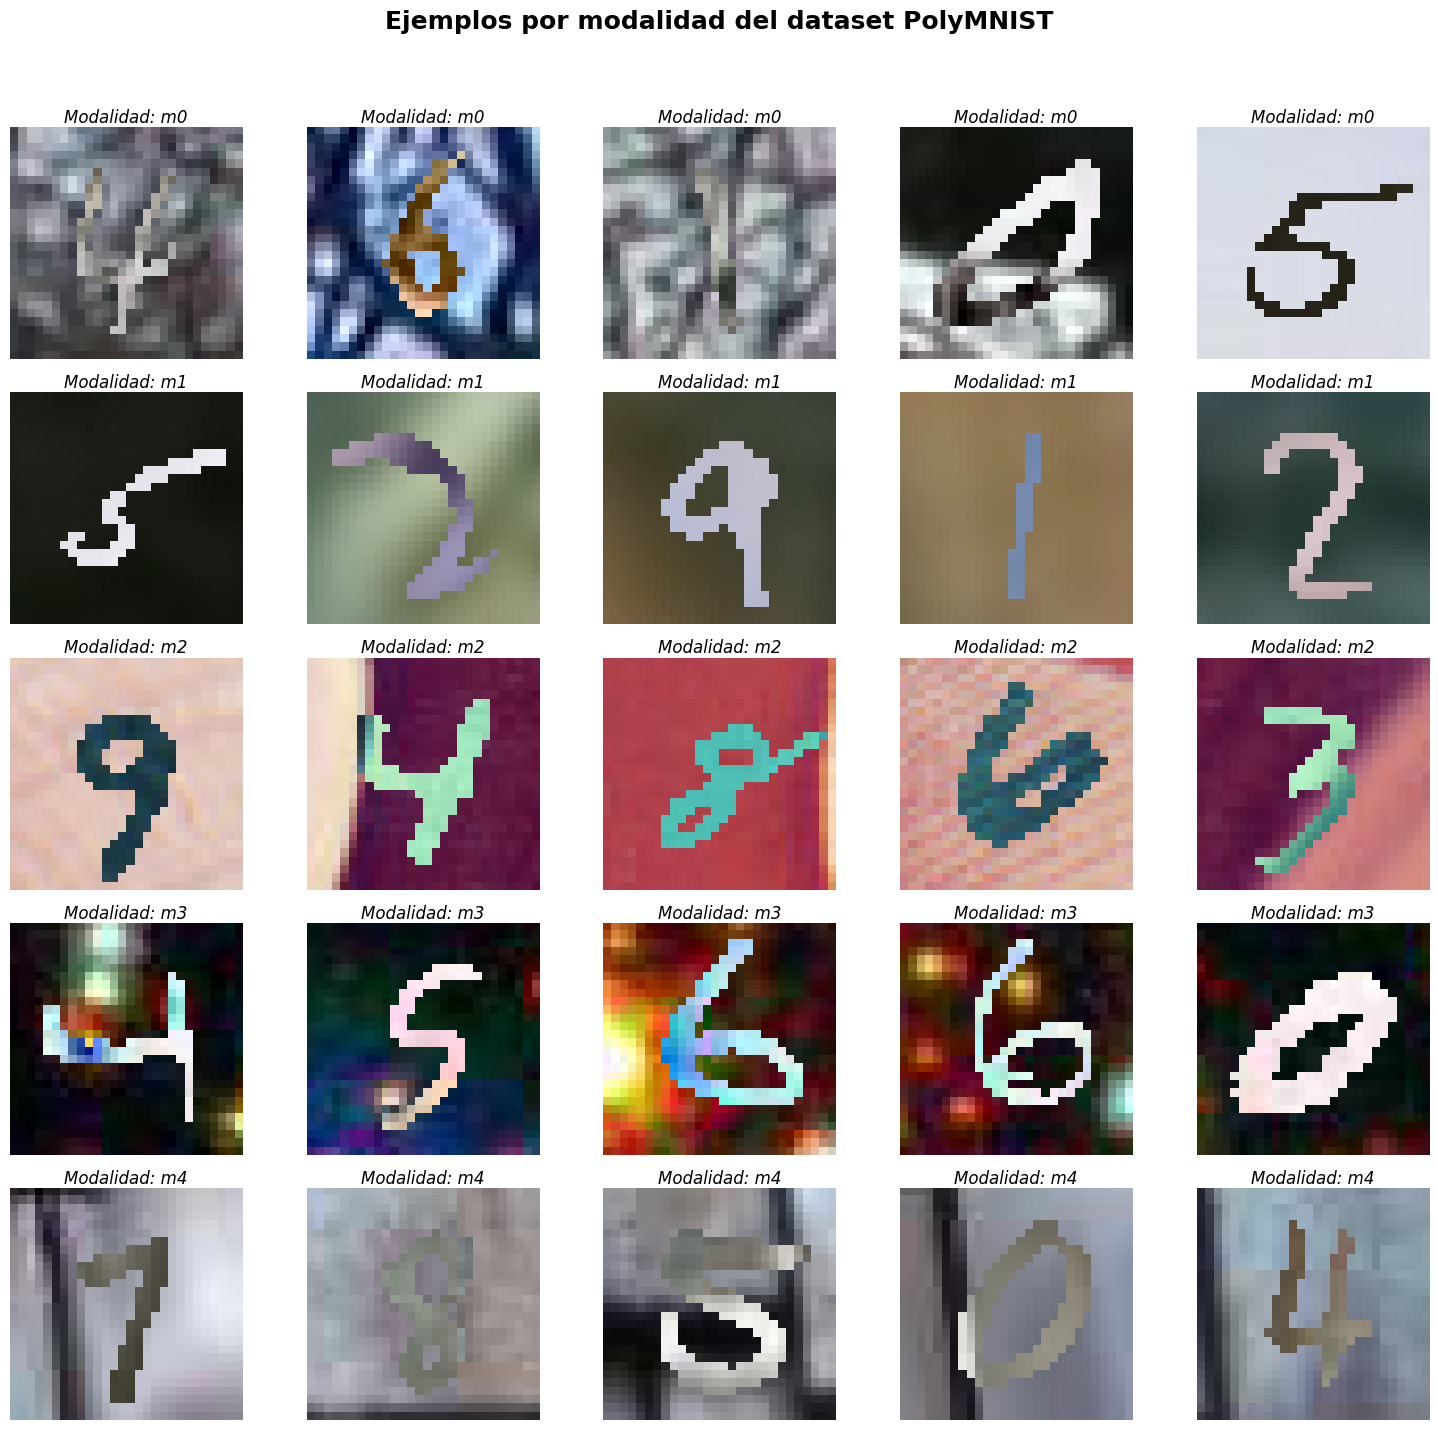

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.suptitle("Ejemplos por modalidad del dataset PolyMNIST", fontsize=18, fontweight="bold")

for row, modalidad in enumerate(modalidades):
    path = os.path.join(base_path, modalidad)
    imagenes = [f for f in os.listdir(path) if f.endswith(".png")]
    muestras = random.sample(imagenes, 5)

    for col, nombre_img in enumerate(muestras):
        img_path = os.path.join(path, nombre_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axes[row, col]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Modalidad: {modalidad}", fontsize=12, pad=3, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observaciones sobre las modalidades del dataset PolyMNIST

- Cada modalidad (`m0` a `m4`) presenta variaciones visuales distintas en el fondo.

- El dígito manuscrito es el elemento constante entre modalidades, pero cambia su color, grosor y contraste.

- Las modalidades m3 y m4 son visualmente más ruidosas.

Variación en los fondos por modalidad
Cada modalidad (m0, m1, m2, m3, m4) tiene un estilo de fondo característico:

- m0: fondos sólidos o texturas simples (como azul claro).

- m1: colores más vivos o planos (naranja, marrón).

- m2: fondos con texturas más orgánicas o difusas (rosado, rojo).

- m3: fondos oscuros o con efectos de luces, como luces navideñas (muy ruidoso).

- m4: desenfoque, alto contraste o mezcla de tonos grises (más abstracto).



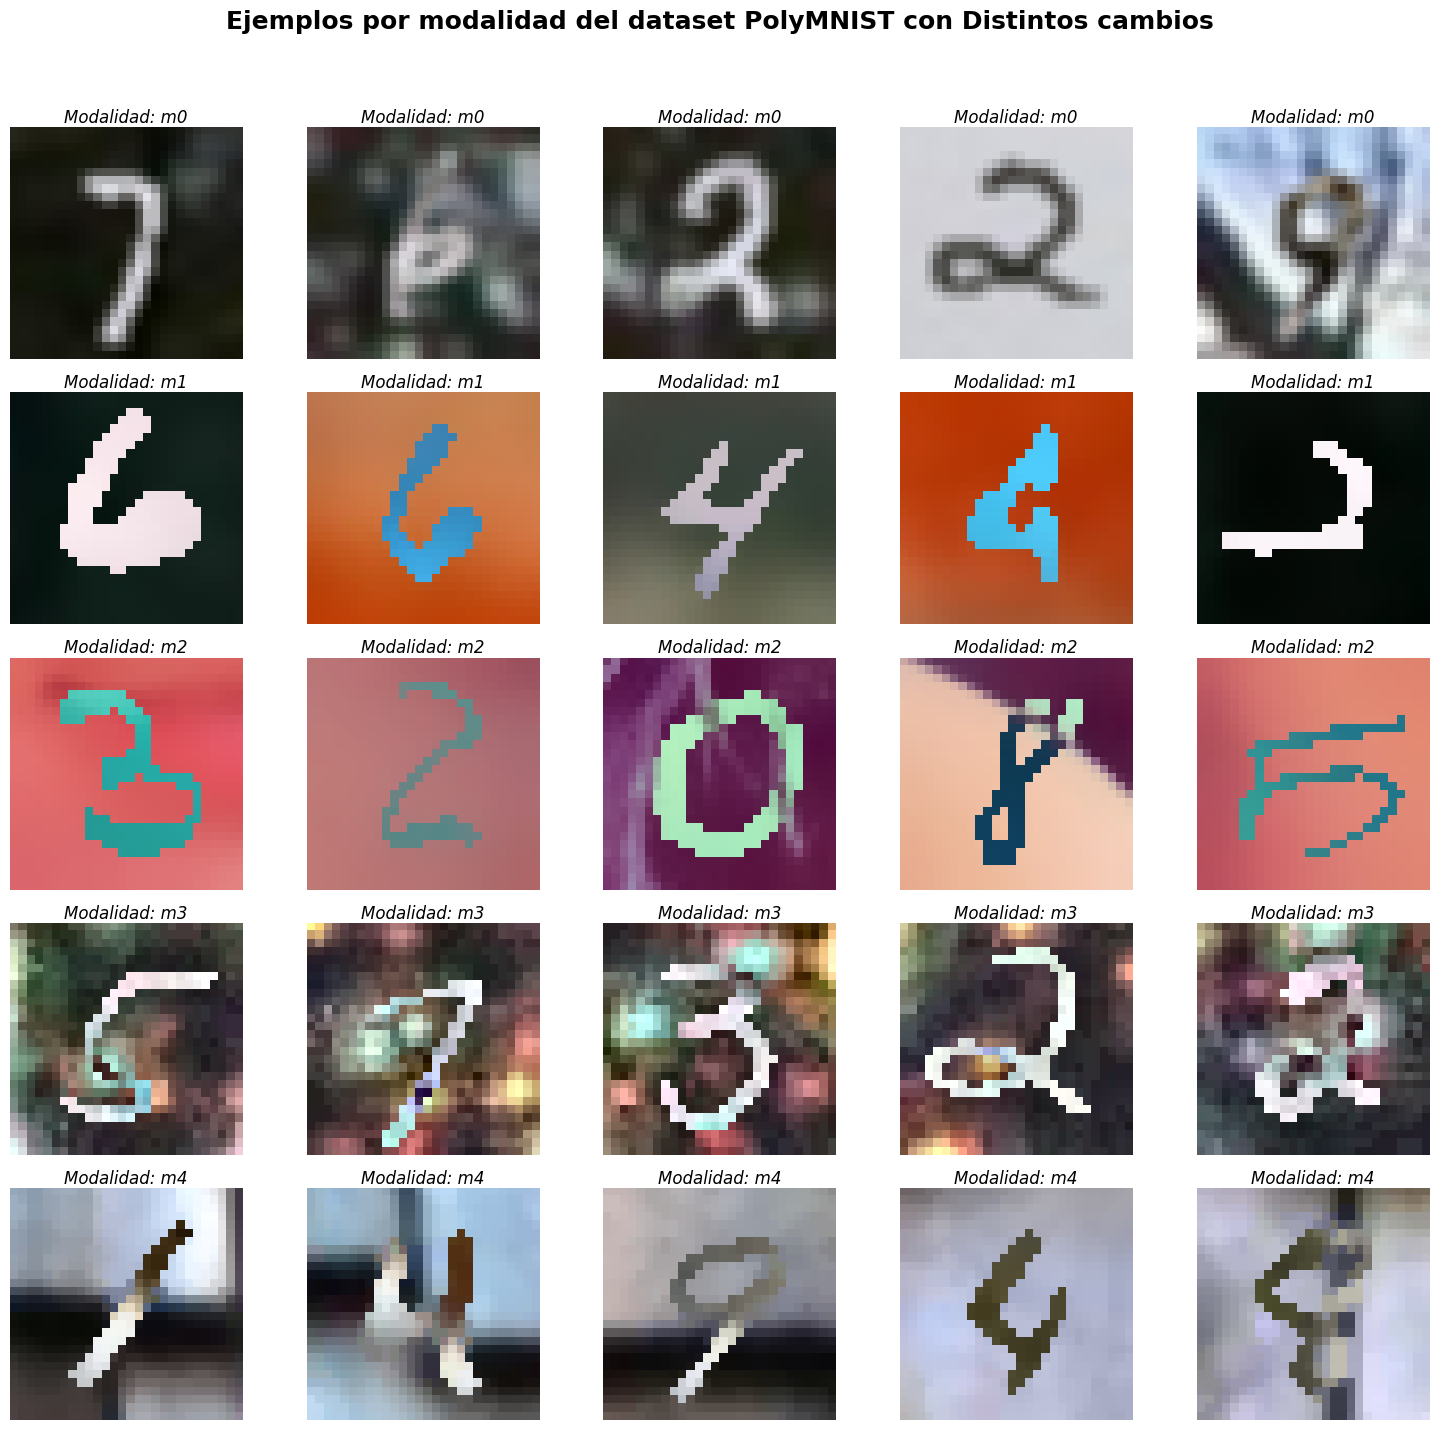

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"

def aplicar_filtro(img, modalidad):
    if modalidad == "m0":
        # Ligero suavizado gaussiano
        return cv2.GaussianBlur(img, (3, 3), 0)
    elif modalidad == "m1":
        # Suavizado mediano (mejor para ruido sal y pimienta)
        return cv2.medianBlur(img, 3)
    elif modalidad == "m2":
        # Bilateral (suaviza sin perder bordes)
        return cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
    elif modalidad == "m3":
        # Suavizado + mejora de contraste CLAHE
        img = cv2.bilateralFilter(img, 9, 75, 75)
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        l_clahe = clahe.apply(l)
        lab = cv2.merge((l_clahe, a, b))
        return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    elif modalidad == "m4":
        # Suavizado mediano (mejor para ruido sal y pimienta)
        return cv2.medianBlur(img, 3)
    else:
        return img  # por defecto sin filtro

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.suptitle("Ejemplos por modalidad del dataset PolyMNIST con Distintos cambios", fontsize=18, fontweight="bold")

for row, modalidad in enumerate(modalidades):
    path = os.path.join(base_path, modalidad)
    imagenes = [f for f in os.listdir(path) if f.endswith(".png")]
    muestras = random.sample(imagenes, 5)

    for col, nombre_img in enumerate(muestras):
        img_path = os.path.join(path, nombre_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img = aplicar_filtro(img, modalidad)

        ax = axes[row, col]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Modalidad: {modalidad}", fontsize=12, pad=3, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Con el objetivo de analizar cómo responden visualmente las distintas modalidades del dataset PolyMNIST a diversas técnicas de reducción de ruido, se aplicaron filtros específicos a cada grupo de imágenes. Inicialmente, se probó un filtro Gaussiano en la modalidad m0, un filtro mediano en m1 y m4, y un filtro bilateral en m2, debido a su capacidad para suavizar la imagen sin perder detalles en los bordes. En la modalidad m3, se combinó el filtro bilateral con una mejora de contraste usando CLAHE, para resaltar mejor los niveles de intensidad. Tras observar los resultados visuales de cada modalidad, se concluyó que el filtro aplicado a la modalidad m2 ofrecía el mejor balance entre reducción de ruido y preservación de contornos, manteniendo la legibilidad de los dígitos sin generar desenfoques excesivos. Por esta razón, en versiones posteriores del experimento, se optó por aplicar el mismo filtro bilateral utilizado en m2 a todas las modalidades, estandarizando el tratamiento de las imágenes y obteniendo una calidad visual más uniforme y adecuada para futuras tareas de clasificación.

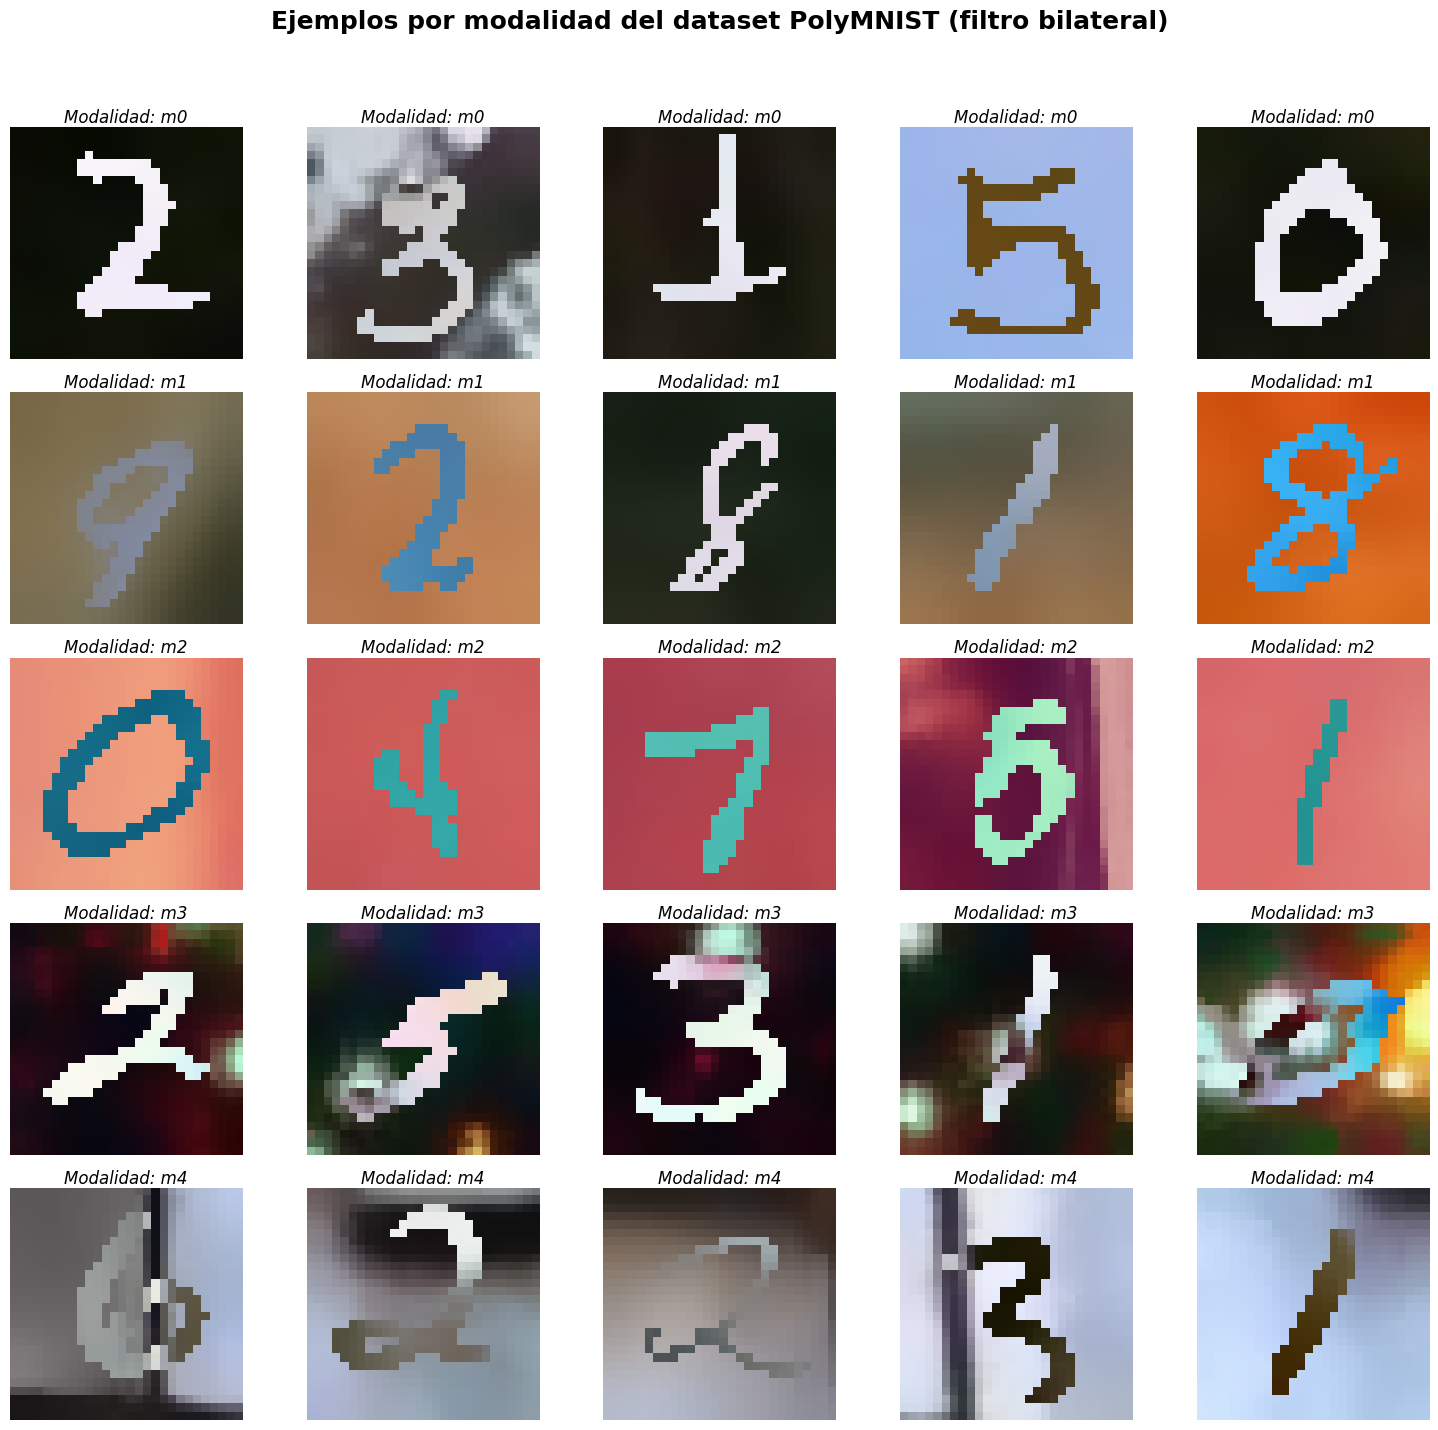

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.suptitle("Ejemplos por modalidad del dataset PolyMNIST (filtro bilateral)", fontsize=18, fontweight="bold")

for row, modalidad in enumerate(modalidades):
    path = os.path.join(base_path, modalidad)
    imagenes = [f for f in os.listdir(path) if f.endswith(".png")]
    muestras = random.sample(imagenes, 5)

    for col, nombre_img in enumerate(muestras):
        img_path = os.path.join(path, nombre_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Aplicar filtro bilateral a todas las imágenes
        img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

        ax = axes[row, col]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Modalidad: {modalidad}", fontsize=12, pad=3, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Ahora que nos parecio el resutlado aplicaremos para todas las iamgens y las guardaremos

In [10]:
import os
import cv2

modalidades = ["m0", "m1", "m2", "m3", "m4"]
input_base = "/content/PolyMNIST/MMNIST/train"
output_base = "/content/PolyMNIST/MMNIST/train_mod"

# Crear carpetas destino
for modalidad in modalidades:
    os.makedirs(os.path.join(output_base, modalidad), exist_ok=True)

# Recorrer cada imagen y aplicar el mismo filtro (bilateral) a todas
for modalidad in modalidades:
    input_path = os.path.join(input_base, modalidad)
    output_path = os.path.join(output_base, modalidad)

    for nombre_img in os.listdir(input_path):
        if not nombre_img.endswith(".png"):
            continue

        img_path = os.path.join(input_path, nombre_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Filtro bilateral aplicado a todas las modalidades
        img_filtrada = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

        # Convertir a BGR antes de guardar
        img_bgr = cv2.cvtColor(img_filtrada, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(output_path, nombre_img), img_bgr)



## Análisis Exploratorio
Veamos si el conjunto de datos está balanceado

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


In [ ]:
# Directorio base de imágenes procesadas
base_path = "/content/PolyMNIST/MMNIST/train_mod"
modalidades = ["m0", "m1", "m2", "m3", "m4"]


In [ ]:
distribucion = {mod: Counter() for mod in modalidades}

for modalidad in modalidades:
    path = os.path.join(base_path, modalidad)
    for nombre_img in os.listdir(path):
        if nombre_img.endswith(".png"):
            clase = nombre_img[0]  # El nombre inicia con la clase: "0.0.png", "3.5.png"
            distribucion[modalidad][clase] += 1

# Convertir a DataFrame para visualización
df_dist = pd.DataFrame(distribucion).fillna(0).astype(int)
df_dist.index.name = "Dígito"
df_dist = df_dist.sort_index()

# Mostrar distribución por modalidad
df_dist


,m0,m1,m2,m3,m4
Dígito,,,,,
0,10,10,10,10,10
1,11110,11110,11110,11110,11110
2,11110,11110,11110,11110,11110
3,11110,11110,11110,11110,11110
4,11110,11110,11110,11110,11110
5,9972,9972,9972,9972,9972
6,2248,2248,2248,2248,2248
7,1110,1110,1110,1110,1110
8,1110,1110,1110,1110,1110


<Figure size 1200x600 with 0 Axes>

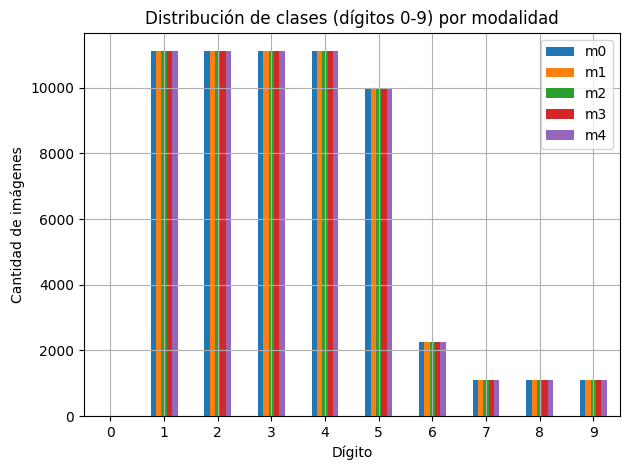

In [ ]:
plt.figure(figsize=(12, 6))
df_dist.plot(kind="bar", stacked=False)
plt.title("Distribución de clases (dígitos 0-9) por modalidad")
plt.xlabel("Dígito")
plt.ylabel("Cantidad de imágenes")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from collections import defaultdict

resoluciones = defaultdict(Counter)

for modalidad in modalidades:
    path = os.path.join(base_path, modalidad)
    archivos = [f for f in os.listdir(path) if f.endswith(".png")]
    muestras = archivos[:100]  # Tomar una muestra de 100 imágenes por eficiencia

    for nombre_img in muestras:
        img_path = os.path.join(path, nombre_img)
        img = cv2.imread(img_path)
        h, w = img.shape[:2]
        resoluciones[modalidad][(w, h)] += 1

# Mostrar resoluciones más comunes por modalidad
for modalidad in modalidades:
    print(f"\nModalidad {modalidad}:")
    for res, count in resoluciones[modalidad].most_common():
        print(f"  Resolución {res[0]}x{res[1]} → {count} veces")



Modalidad m0:
  Resolución 28x28 → 100 veces

Modalidad m1:
  Resolución 28x28 → 100 veces

Modalidad m2:
  Resolución 28x28 → 100 veces

Modalidad m3:
  Resolución 28x28 → 100 veces

Modalidad m4:
  Resolución 28x28 → 100 veces


In [ ]:
total_por_mod = {mod: sum(distribucion[mod].values()) for mod in modalidades}
print("Total de imágenes por modalidad:")
for mod, total in total_por_mod.items():
    print(f"  {mod}: {total} imágenes")

if len(set(total_por_mod.values())) == 1:
    print("\n✅ El conjunto de datos está balanceado entre modalidades.")
else:
    print("\n⚠️ El conjunto de datos NO está balanceado entre modalidades.")


Total de imágenes por modalidad:
  m0: 60000 imágenes
  m1: 60000 imágenes
  m2: 60000 imágenes
  m3: 60000 imágenes
  m4: 60000 imágenes

✅ El conjunto de datos está balanceado entre modalidades.


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Leer imágenes desde la carpeta filtrada
def cargar_datos(path, img_size=(28, 28)):
    X, y = [], []
    for modalidad in os.listdir(path):
        ruta_mod = os.path.join(path, modalidad)
        for nombre_img in os.listdir(ruta_mod):
            if nombre_img.endswith(".png"):
                etiqueta = int(nombre_img[0])
                img = cv2.imread(os.path.join(ruta_mod, nombre_img), cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(etiqueta)
    return np.array(X), np.array(y)

X, y = cargar_datos("/content/PolyMNIST/MMNIST/train_mod")
X = X.astype("float32") / 255.0
X = np.expand_dims(X, axis=-1)  # (N, 28, 28, 1)
y_cat = to_categorical(y, num_classes=10)

# Split entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

modelo_cnn_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

modelo_cnn_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist_cnn_1 = modelo_cnn_1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 122s 32ms/step - accuracy: 0.1819 - loss: 1.9047 - val_accuracy: 0.1841 - val_loss: 1.8921
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 134s 30ms/step - accuracy: 0.1909 - loss: 1.8887 - val_accuracy: 0.1809 - val_loss: 1.8940
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 141s 30ms/step - accuracy: 0.1944 - loss: 1.8839 - val_accuracy: 0.1852 - val_loss: 1.8918
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - accuracy: 0.1987 - loss: 1.8790 - val_accuracy: 0.1835 - val_loss: 1.8928
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 112s 30ms/step - accuracy: 0.2072 - loss: 1.8742 - val_accuracy: 0.1801 - val_loss: 1.8997
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 148s 31ms/step - accuracy: 0.2107 - loss: 1.8677 - val_accuracy: 0.1836 - val_loss: 1.9001
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 132s 29ms/step - accuracy: 0.2178 - loss: 1.8614 - val_accuracy: 0.1834 - val_loss: 1.9075
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 110s 29ms/step - accuracy: 

In [ ]:
modelo_cnn_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

modelo_cnn_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist_cnn_2 = modelo_cnn_2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 206s 54ms/step - accuracy: 0.1840 - loss: 1.9086 - val_accuracy: 0.1847 - val_loss: 1.8926
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 266s 55ms/step - accuracy: 0.1856 - loss: 1.8905 - val_accuracy: 0.1868 - val_loss: 1.8909
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 260s 55ms/step - accuracy: 0.1853 - loss: 1.8866 - val_accuracy: 0.1880 - val_loss: 1.8891
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 251s 52ms/step - accuracy: 0.1862 - loss: 1.8871 - val_accuracy: 0.1847 - val_loss: 1.8893
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 205s 55ms/step - accuracy: 0.1870 - loss: 1.8836 - val_accuracy: 0.1835 - val_loss: 1.8889
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 253s 52ms/step - accuracy: 0.1879 - loss: 1.8825 - val_accuracy: 0.1845 - val_loss: 1.8893
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 203s 54ms/step - accuracy: 0.1898 - loss: 1.8819 - val_accuracy: 0.1839 - val_loss: 1.8902
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 255s 52ms/step - accuracy: 

In [ ]:
from tensorflow.keras.layers import Reshape

modelo_dnn = Sequential([
    Reshape((28*28,), input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

modelo_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist_dnn = modelo_dnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.1838 - loss: 1.9184 - val_accuracy: 0.1838 - val_loss: 1.8950
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.1873 - loss: 1.8919 - val_accuracy: 0.1852 - val_loss: 1.8947
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.1858 - loss: 1.8933 - val_accuracy: 0.1851 - val_loss: 1.8953
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.1852 - loss: 1.8916 - val_accuracy: 0.1867 - val_loss: 1.8943
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - accuracy: 0.1862 - loss: 1.8917 - val_accuracy: 0.1845 - val_loss: 1.8946
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.1856 - loss: 1.8932 - val_accuracy: 0.1831 - val_loss: 1.8942
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.1853 - loss: 1.8900 - val_accuracy: 0.1868 - val_loss: 1.8942
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.1832 - loss: 1

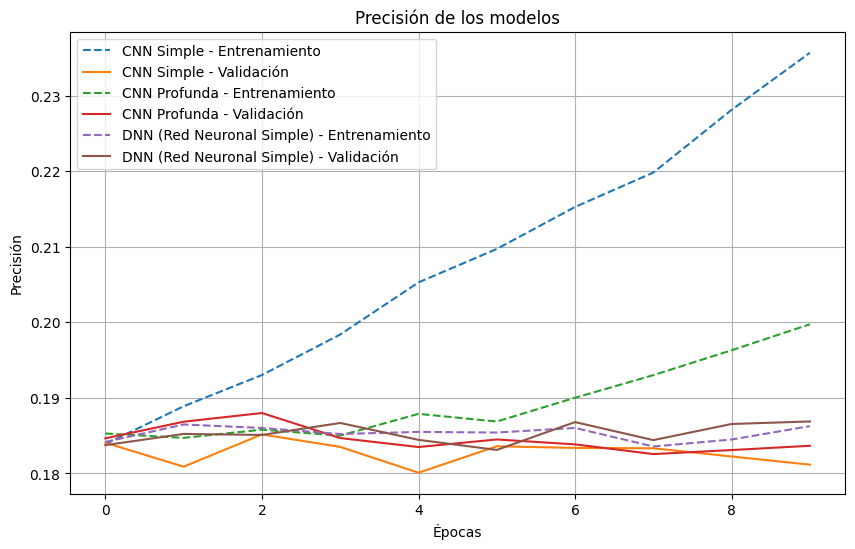

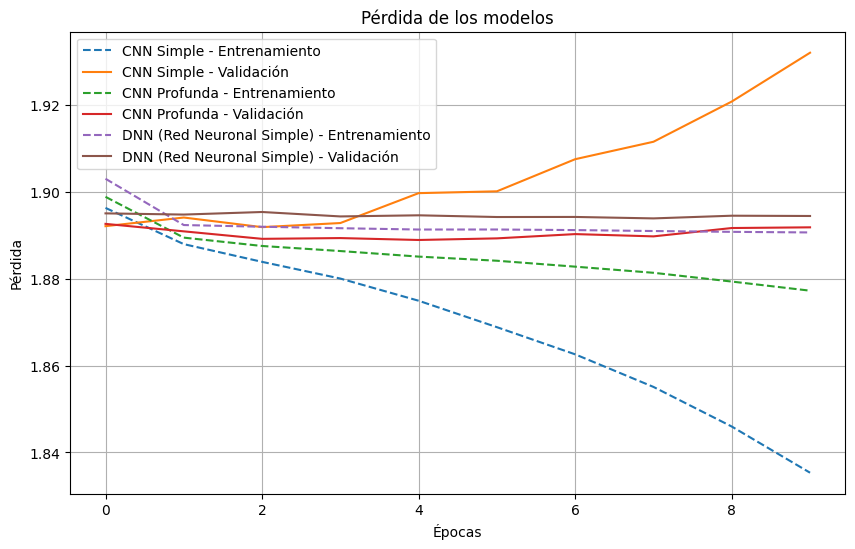

In [ ]:
import matplotlib.pyplot as plt

def plot_metric(histories, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f"{name} - Entrenamiento", linestyle='--')
        plt.plot(history.history[f"val_{metric}"], label=f"{name} - Validación")
    plt.title(title)
    plt.xlabel("Épocas")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Diccionario con los históricos
histories = {
    "CNN Simple": hist_cnn_1,
    "CNN Profunda": hist_cnn_2,
    "DNN (Red Neuronal Simple)": hist_dnn
}

# Precisión
plot_metric(histories, "accuracy", "Precisión de los modelos", "Precisión")

# Pérdida
plot_metric(histories, "loss", "Pérdida de los modelos", "Pérdida")


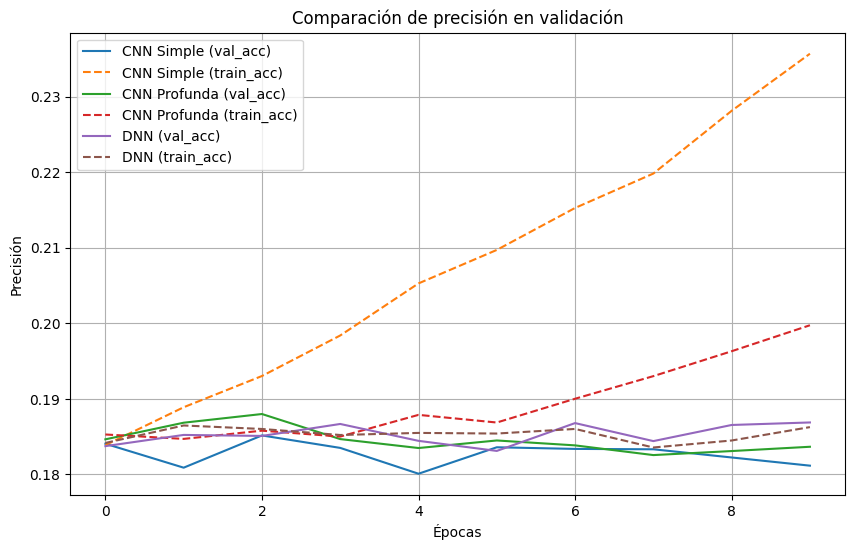

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, label):
    plt.plot(history.history['val_accuracy'], label=f'{label} (val_acc)')
    plt.plot(history.history['accuracy'], linestyle='--', label=f'{label} (train_acc)')

plt.figure(figsize=(10, 6))
plot_history(hist_cnn_1, "CNN Simple")
plot_history(hist_cnn_2, "CNN Profunda")
plot_history(hist_dnn, "DNN")
plt.title("Comparación de precisión en validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import os
import cv2

print("Iniciando carga y preprocesamiento de imágenes...")

# Cargar y preprocesar datos
modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"  # Ajusta la ruta si es necesario
X = []
y = []

for idx, modalidad in enumerate(modalidades):
    print(f"Procesando modalidad: {modalidad}...")
    path = os.path.join(base_path, modalidad)
    for i, archivo in enumerate(os.listdir(path)):
        if archivo.endswith(".png"):
            img_path = os.path.join(path, archivo)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            X.append(img.flatten())
            y.append(idx)
            if i % 500 == 0:
                print(f"  {i} imágenes procesadas en {modalidad}...")

print("Conversión a arrays de numpy...")
X = np.array(X)
y = np.array(y)

print("Dividiendo datos en entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando modelo Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Realizando predicciones...")
y_pred = rf_model.predict(X_test)

print("Informe de Clasificación Random Forest:")
print(classification_report(y_test, y_pred))


Iniciando carga y preprocesamiento de imágenes...
Procesando modalidad: m0...
  0 imágenes procesadas en m0...
  500 imágenes procesadas en m0...
  1000 imágenes procesadas en m0...
  1500 imágenes procesadas en m0...
  2000 imágenes procesadas en m0...
  2500 imágenes procesadas en m0...
  3000 imágenes procesadas en m0...
  3500 imágenes procesadas en m0...
  4000 imágenes procesadas en m0...
  4500 imágenes procesadas en m0...
  5000 imágenes procesadas en m0...
  5500 imágenes procesadas en m0...
  6000 imágenes procesadas en m0...
  6500 imágenes procesadas en m0...
  7000 imágenes procesadas en m0...
  7500 imágenes procesadas en m0...
  8000 imágenes procesadas en m0...
  8500 imágenes procesadas en m0...
  9000 imágenes procesadas en m0...
  9500 imágenes procesadas en m0...
  10000 imágenes procesadas en m0...
  10500 imágenes procesadas en m0...
  11000 imágenes procesadas en m0...
  11500 imágenes procesadas en m0...
  12000 imágenes procesadas en m0...
  12500 imágenes proc

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2

# Cargar y preprocesar datos (igual que arriba, pero mantener como arrays 2D para CNN)
modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"  # Ajusta la ruta
X = []
y = []

for idx, modalidad in enumerate(modalidades):
    path = os.path.join(base_path, modalidad)
    for archivo in os.listdir(path):
        if archivo.endswith(".png"):
            img_path = os.path.join(path, archivo)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            X.append(img)  # Mantener como array 28x28
            y.append(idx)

X = np.array(X).reshape(-1, 28, 28, 1) / 255.0  # Normalizar y agregar dimensión de canal
y = np.array(y)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generador de Datos de Imagen para aumento
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Modelo CNN de ejemplo (asumiendo del ejercicio 3)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 modalidades
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo con datos aumentados
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

# Evaluar
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión de CNN con Aumento: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7500/7500 ━━━━━━━━━━━━━━━━━━━━ 280s 37ms/step - accuracy: 0.7195 - loss: 0.6734 - val_accuracy: 0.8507 - val_loss: 0.3578
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 283s 38ms/step - accuracy: 0.8932 - loss: 0.2715 - val_accuracy: 0.9366 - val_loss: 0.1931
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 269s 36ms/step - accuracy: 0.9220 - loss: 0.2052 - val_accuracy: 0.9382 - val_loss: 0.1643
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 274s 37ms/step - accuracy: 0.9382 - loss: 0.1648 - val_accuracy: 0.9610 - val_loss: 0.1110
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 267s 36ms/step - accuracy: 0.9469 - loss: 0.1457 - val_accuracy: 0.9517 - val_loss: 0.1361
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 271s 36ms/step - accuracy: 0.9521 - loss: 0.1304 - val_accuracy: 0.9573 - val_loss: 0.1163
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 278s 37ms/step - accuracy: 0.9554 - loss: 0.1213 - val_accuracy: 0.9658 - val_loss: 0.0957
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 278s 37ms/step - accuracy: 0.9590 - lo

In [15]:
model.save("mejor_modelo.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Resultados de predicción:
imagen1.png | Real: 3 | Predicción: 4 | ❌
imagen2.png | Real: 7 | Predicción: 0 | ❌


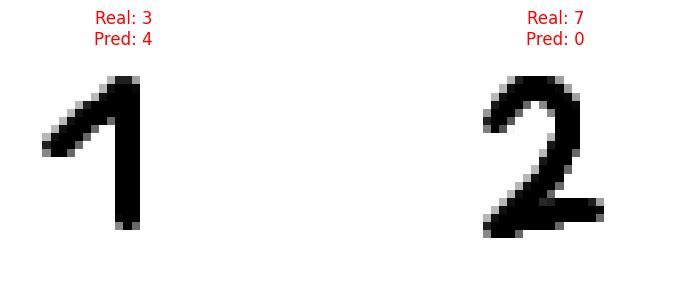

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


model = load_model("mejor_modelo.h5")

# 2. Rutas de las imágenes manuscritas y sus etiquetas reales
handwritten_paths = ["imagen1.png", "imagen2.png"]
handwritten_labels = [3, 7]  # Cambia estos valores por las etiquetas reales

# 3. Preprocesamiento de imágenes
handwritten_X = []
cargadas_labels = []
cargadas_paths = []

for path, label in zip(handwritten_paths, handwritten_labels):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"[ERROR] No se pudo cargar la imagen: {path}")
        continue
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    handwritten_X.append(img.reshape(28, 28, 1))
    cargadas_labels.append(label)
    cargadas_paths.append(path)

# 4. Convertir a array y predecir
handwritten_X = np.array(handwritten_X)
predictions = model.predict(handwritten_X)
predicted_labels = np.argmax(predictions, axis=1)

# 5. Mostrar resultados en consola
print("\nResultados de predicción:")
for i, (real, pred, path) in enumerate(zip(cargadas_labels, predicted_labels, cargadas_paths)):
    correcto = "✅" if real == pred else "❌"
    print(f"{path} | Real: {real} | Predicción: {pred} | {correcto}")

# 6. Mostrar imágenes con predicciones
fig, axes = plt.subplots(1, len(cargadas_paths), figsize=(10, 3))
for i, (img, real, pred) in enumerate(zip(handwritten_X, cargadas_labels, predicted_labels)):
    axes[i].imshow(img.reshape(28, 28), cmap="gray")
    axes[i].set_title(f"Real: {real}\nPred: {pred}", color="green" if real == pred else "red")
    axes[i].axis("off")
plt.tight_layout()
plt.show()
